In [4]:
def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

In [5]:
#Zad 1
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.metrics as met
np.random.seed(242)
train = generate_data(200)
np.random.seed(12)
test = generate_data(100)

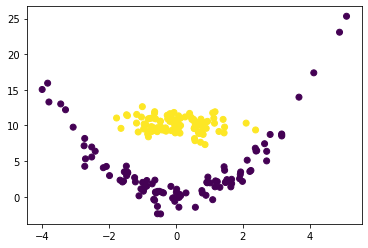

In [6]:
#Zad2
x1 = train[:,0]
x2 = train[:,1]
y = train[:,2]
plt.scatter(x=x1,y=x2,c=y)

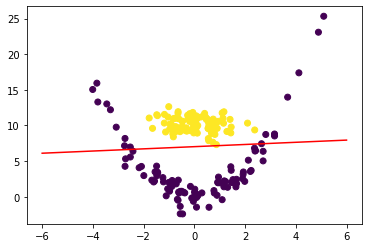

In [8]:
#Zad3
model = lm.LogisticRegression(solver='liblinear')
plt.scatter(x=x1,y=x2,c=y)
x1x2 = train[:,:2]
model.fit(x1x2,y)
xModel = np.linspace(-6, 6, 1000)
yModel =- (model.coef_[0][0]*xModel + model.intercept_[0])/model.coef_[0][1]
plt.plot(xModel, yModel, c='r')
#Ne znam zasto ne ispada dobro


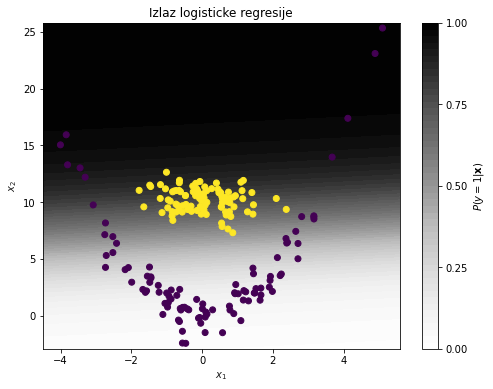

In [39]:
#Zad4
f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(train[:,0])-0.5:max(train[:,0])+0.5:.05,
                          min(train[:,1])-0.5:max(train[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(x_grid.shape)

cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)

ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
ax.autoscale(False)
plt.scatter(x1, x2, c=y)
plt.show()

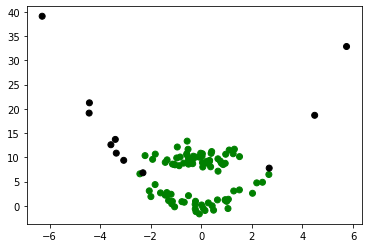

In [42]:
#Zad5
test_x1 = test[:,0]
test_x2 = test[:,1]
test_x1x2=model.predict(test[:,:2])
test_y=test[:,2]
test_colors = ['g' if test_x1x2[i] == test_y[i] else 'k' 
               for i in range(len(test_y))]

plt.scatter(x=test_x1,y=test_x2,c=test_colors)

In [43]:
def plot_confusion_matrix(c_matrix):
    
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()

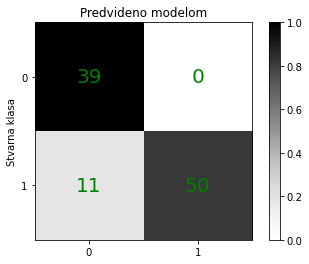

[[39  0]
 [11 50]]
Accuracy:
0.89
Miss Rate:
0.10999999999999999
Precision:
1.0
Recall:
0.819672131147541
specificnost:
1.0


In [45]:
confusion_matrix=met.confusion_matrix(test_x1x2, test_y)
plot_confusion_matrix(confusion_matrix)
print(confusion_matrix)
print("Accuracy:")#a=tp+tn/tp+tn+fp+fn
accuracy=met.accuracy_score(test_x1x2, test_y)
print(accuracy)

print("Miss Rate:")
miss_rate = 1-accuracy
print(miss_rate)

print("Precision:")#tp/tp+fp
precision=met.precision_score(test_x1x2, test_y)
print(precision)
print("Recall:")#tp/tp+fn
recall=met.recall_score(test_x1x2, test_y)
print(recall)

print("specificnost:")#tn/tn+fp
spec=confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
print(spec)

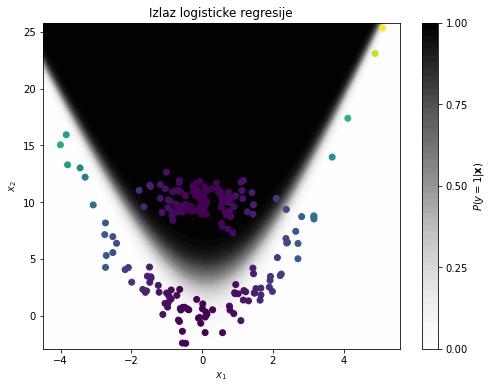

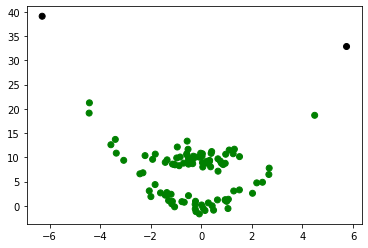

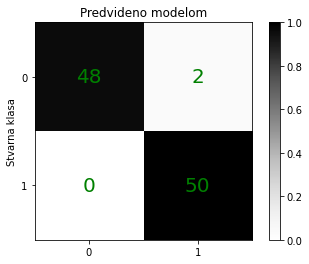

[[48  2]
 [ 0 50]]
tocnost:
0.98
ucestalost pogresne kvalifikacije:
0.020000000000000018
preciznost:
0.9615384615384616
odziv:
1.0
specificnost:
0.9615384615384616


In [56]:
#Zad7
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.metrics as met
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias = False)
train_new = poly.fit_transform(train[:,0:2])
test_new = poly.fit_transform(test[:,0:2])
model.fit(train_new,y)

f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(train_new[:,0])-0.5:max(train_new[:,0])+0.5:.05,
                          min(train_new[:,1])-0.5:max(train_new[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
grid=poly.fit_transform(grid)

probs = model.predict_proba(grid)[:, 1].reshape(x_grid.shape)

cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)

ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
ax.autoscale(False)
plt.scatter(train_new[:, 0], train_new[:, 1], c=train_new[:, 2])
plt.show()


#zadazak 5.
test_p=model.predict(test_new)
test_e=test[:,2]
test_colors = ['g' if test_p[i] == test_e[i] else 'k' 
               for i in range(len(test_p))]

plt.scatter(x=test_new[:,0],y=test_new[:,1],c=test_colors)

#zadatak 6
confusion_matrix=met.confusion_matrix(test_e, test_p)
plot_confusion_matrix(confusion_matrix)
print(confusion_matrix)
print("tocnost:")#a=tp+tn/tp+tn+fp+fn
acc=met.accuracy_score(test_e, test_p)
print(acc)

print("ucestalost pogresne kvalifikacije:")
miss_rate = 1-acc
print(miss_rate)

print("preciznost:")#tp/tp+fp
pres=met.precision_score(test_e, test_p)
print(pres)
print("odziv:")#tp/tp+fn
rec=met.recall_score(test_e, test_p)
print(rec)

print("specificnost:")#tn/tn+fp
spec=confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
print(spec)